# 第一讲：图论基础

In [95]:
import numpy as np

from matplotlib import pyplot as plt
plt.rcParams['font.family'] = 'serif'  # 'serif', 'sans-serif', 'monospace', 'fantasy', 'cursive'
plt.rcParams['font.serif'] = ['Times New Roman']
cnFont = {'fontname':'Songti SC', 'color':'darkred', 'weight':'bold', 'size':30}
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.bbox'] = 'tight'

import networkx as nx

## 绘制无方无权图

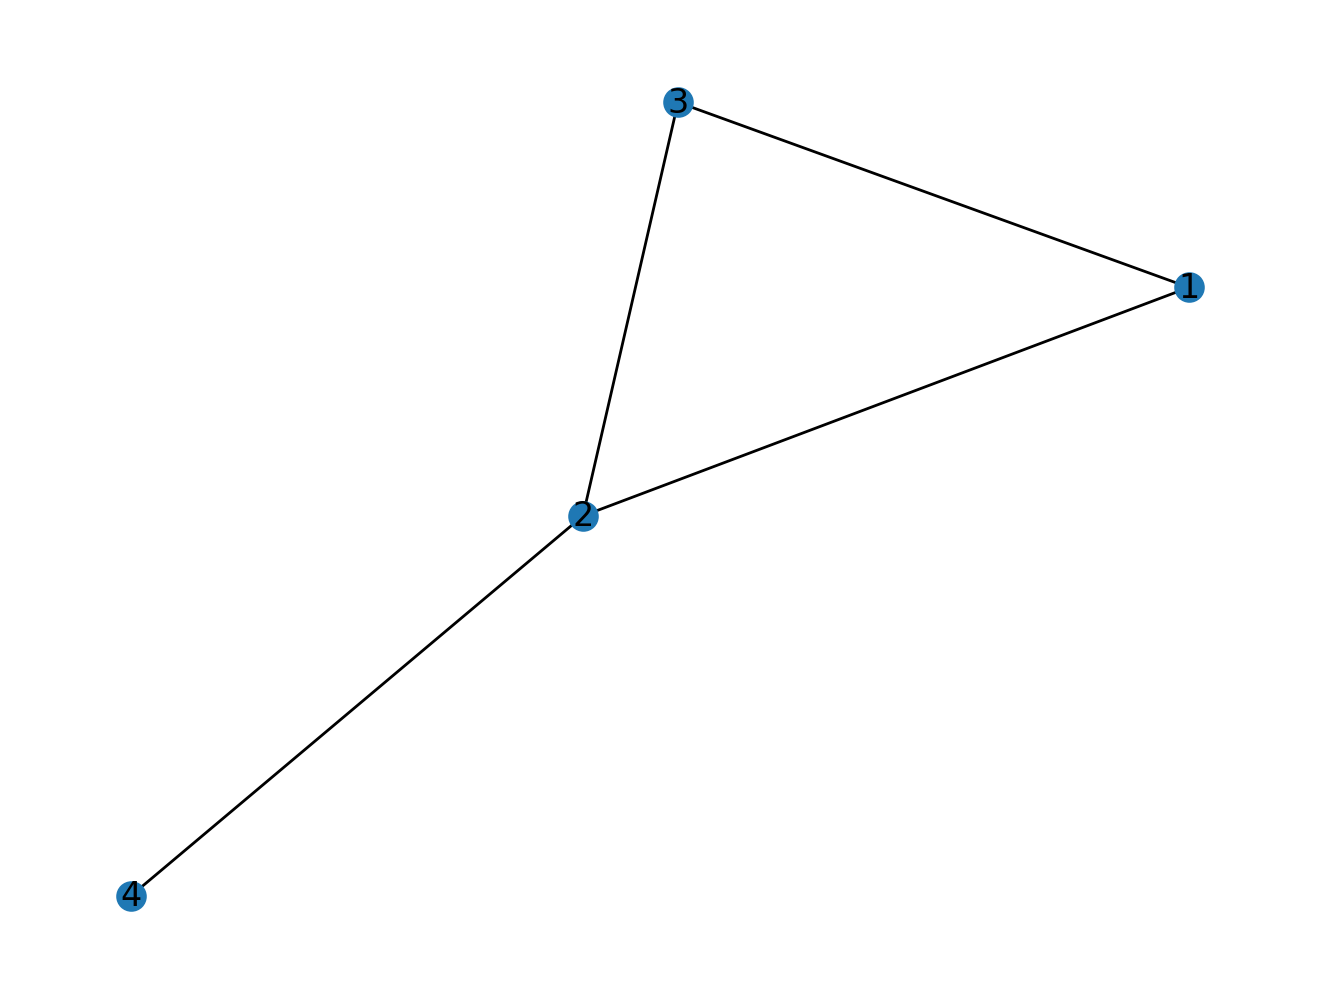

In [96]:
G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4])
G.add_edges_from([(1, 2), (1, 3), (2, 3),(2, 4)])
nx.draw(G, node_size=100, with_labels=True)

## 图与邻接矩阵

In [97]:
# 获取图的邻接矩阵
As = nx.adjacency_matrix(G)
A = As.todense()
# A = nx.to_numpy_array(G,dtype=np.int64)
print(type(As))
print(type(A))

<class 'scipy.sparse._csr.csr_array'>
<class 'numpy.ndarray'>


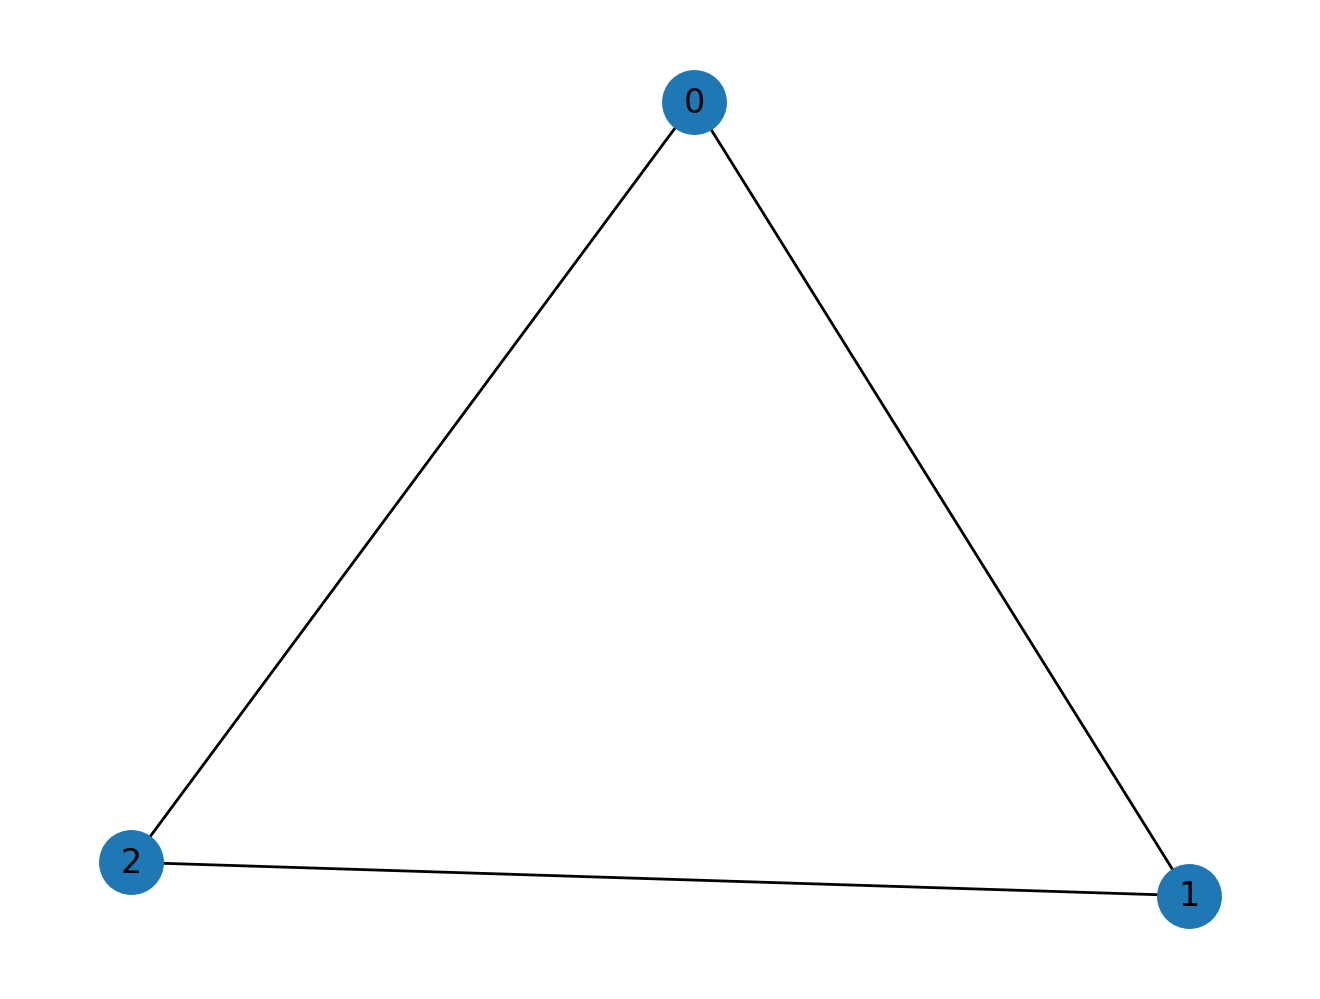

In [98]:
# 已知图的邻接矩阵，创建图
A = np.array([[0,1,1], [1,0,1], [1,1,0]])
G = nx.from_numpy_array(A)
nx.draw(G, node_size=500, with_labels=True)

## 加权图

In [99]:
G = nx.Graph()
G.add_weighted_edges_from([(0,1,3.0),(1,2,7.5),(0,2,1.5)])
As = nx.adjacency_matrix(G)
print(As.todense())

[[0.  3.  1.5]
 [3.  0.  7.5]
 [1.5 7.5 0. ]]


## 有向图

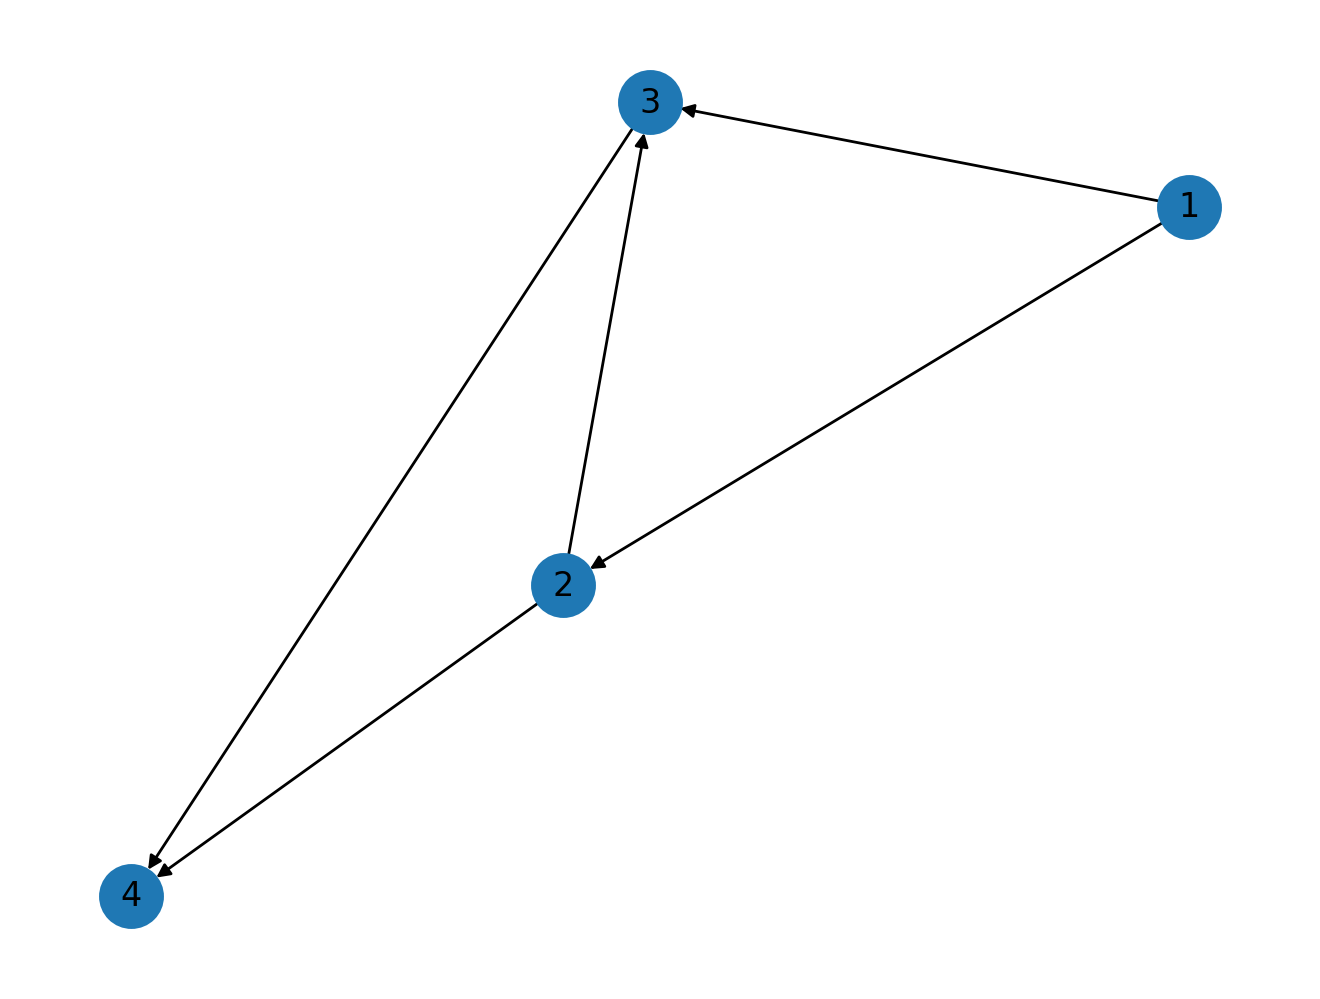

In [100]:
G = nx.DiGraph()
G.add_nodes_from([1,2,3,4])
G.add_edges_from([(1,2),(1,3),(2,3),(2,4),(3,4)])
nx.draw(G,node_size=500, with_labels=True)

## 度、平均度以及度分布

<class 'networkx.classes.reportviews.DegreeView'>
{1: 3, 2: 3, 3: 3, 4: 2, 5: 1}
度:  {1: 3, 2: 3, 3: 3, 4: 2, 5: 1}
平均度: 2.4
频数: [0, 1, 1, 3]
最大度: 3


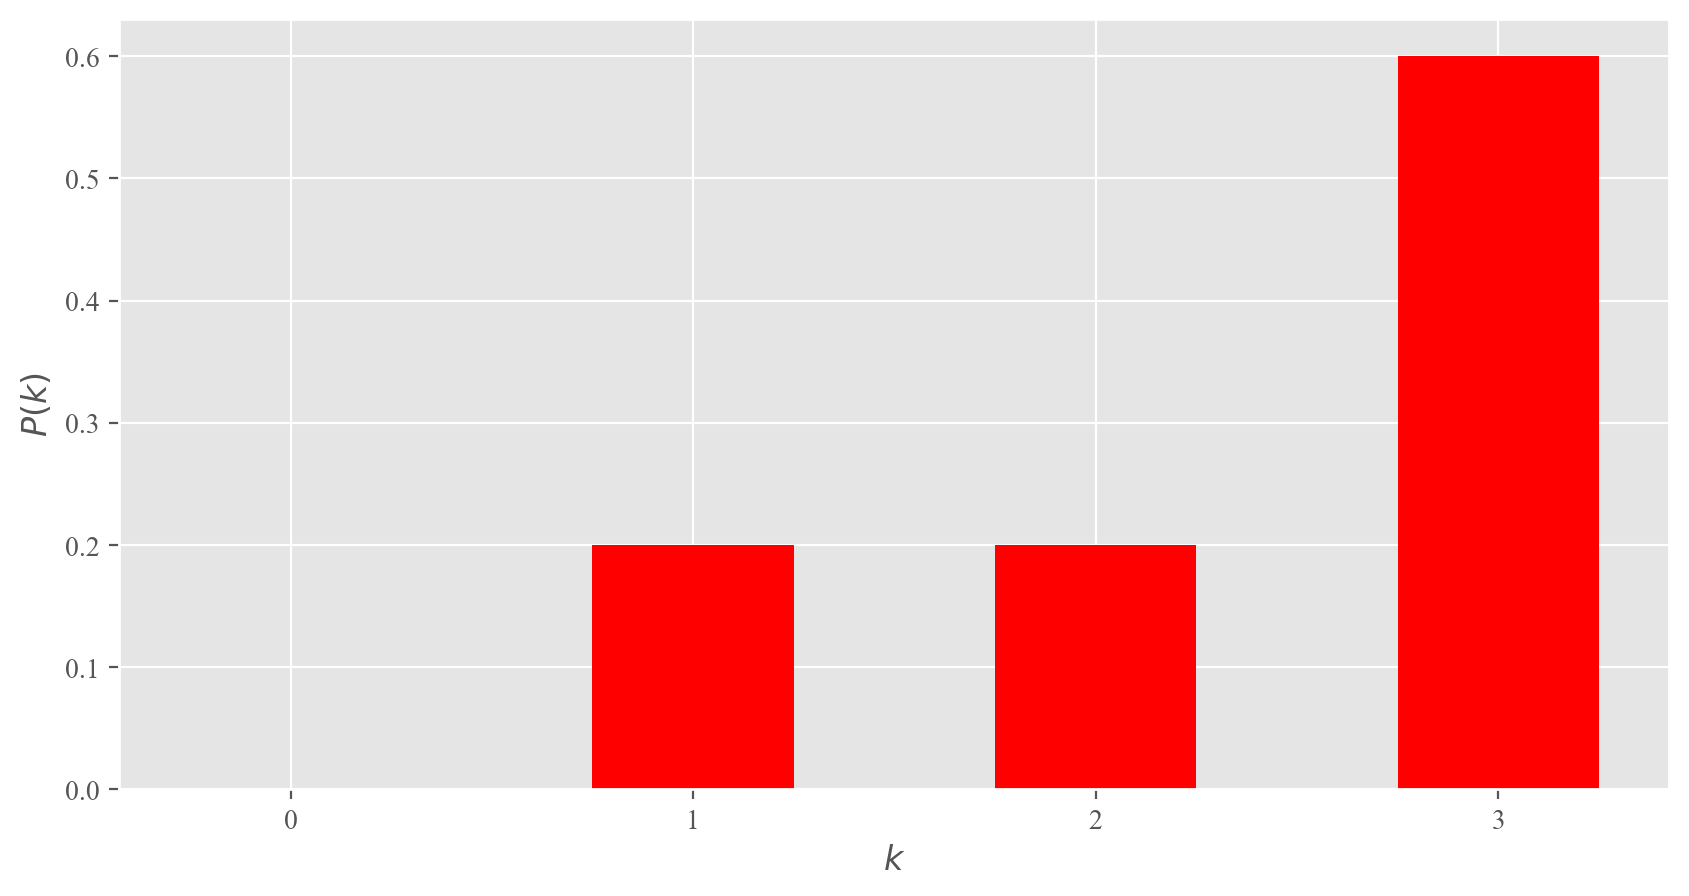

In [101]:
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5])
G.add_edges_from([(1,2),(1,3),(2,3),(2,4),(3,4),(1,5)])
# 网络G的度
degree_view = nx.degree(G)
print(type(degree_view))
degree = dict(degree_view)
print(degree)
print("度: ", degree)
print(f"平均度: {sum(degree.values())/len(G.nodes)}")
# 获取度分布
degree_histogram = nx.degree_histogram(G)
print(f"频数: {degree_histogram}")
maxDegree = max(degree.values())
print(f"最大度: {maxDegree}")
# 绘制分布直方图
with plt.style.context('ggplot'):
    x = list(range(0, maxDegree+1))
    y = [i/len(G.nodes) for i in nx.degree_histogram(G)]
    fig, ax = plt.subplots(1, 1, figsize=(10,5))
    plt.bar(x, y, width=0.5, color='red')
    ax.set_xlabel('$k$')
    ax.set_ylabel('$P(k)$')
    ax.set_xticks(x)

## 路径与距离

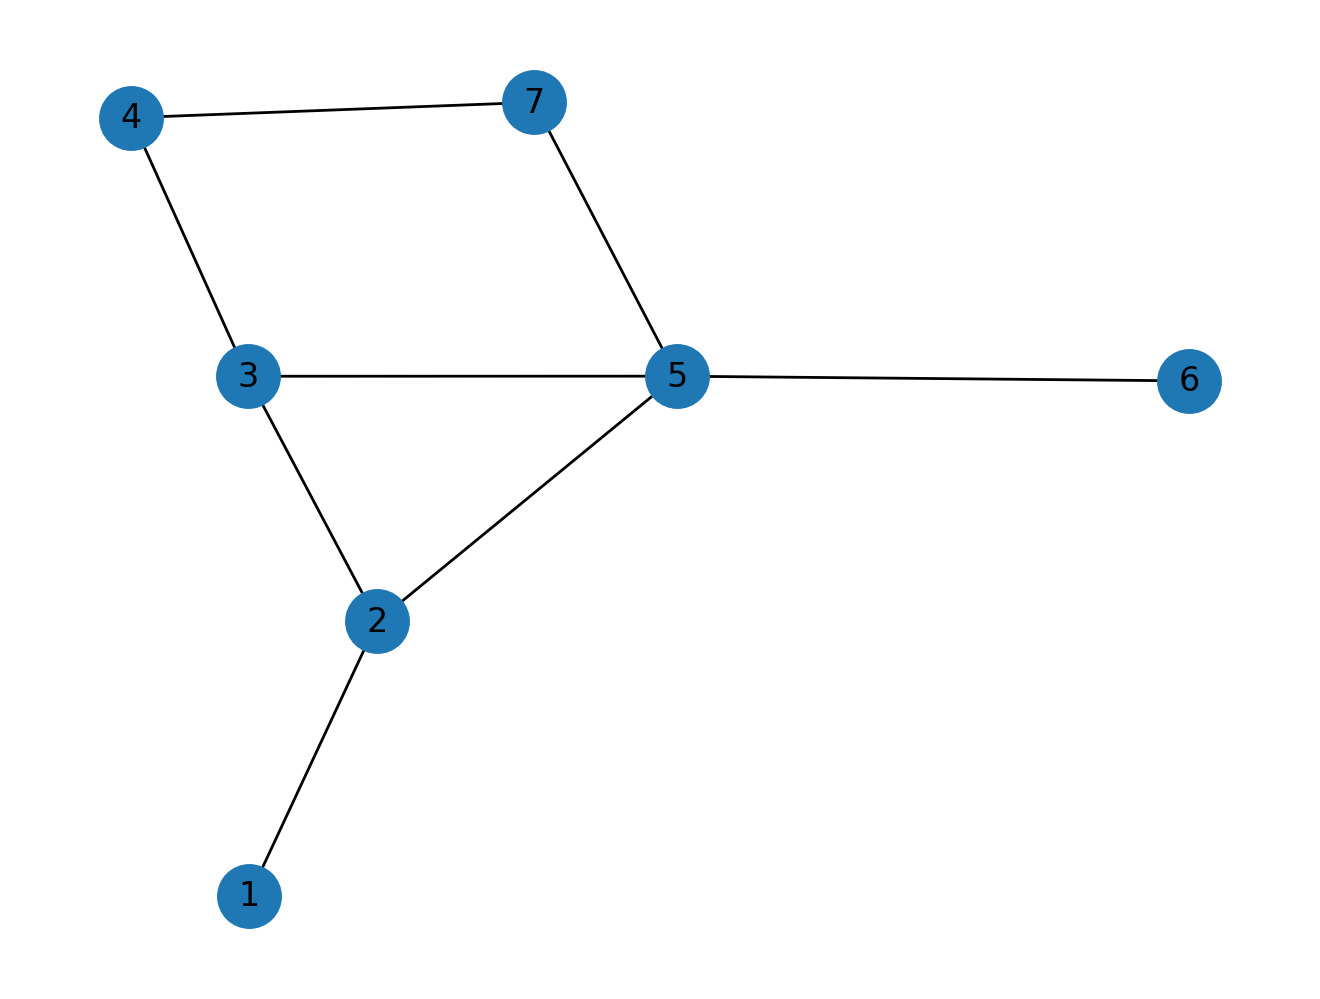

In [102]:
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5,6,7])
G.add_edges_from([(1,2),(2,3),(2,5),(3,4),(5,3),(5,6),(5,7),(4,7)])
nx.draw(G, node_size=500,with_labels=True)

In [103]:
# 最短路径
shortest_path = nx.shortest_path(G, source=1, target=7)
shortest_paths = list(nx.all_shortest_paths(G, source=3, target=7))
print(f"最短路径: {shortest_paths}")
# 最短路径长度(距离)
distance = nx.shortest_path_length(G, source=1, target=4)
print(f"距离: {distance}")
# 整个网络的平均距离
averageDistance = nx.average_shortest_path_length(G)
print(f"平均距离: {round(averageDistance,4)}")

最短路径: [[3, 4, 7], [3, 5, 7]]
距离: 3
平均距离: 1.8095


## 连通性

In [104]:
nx.is_connected(G)

True

### 获得网络的最大连通子图

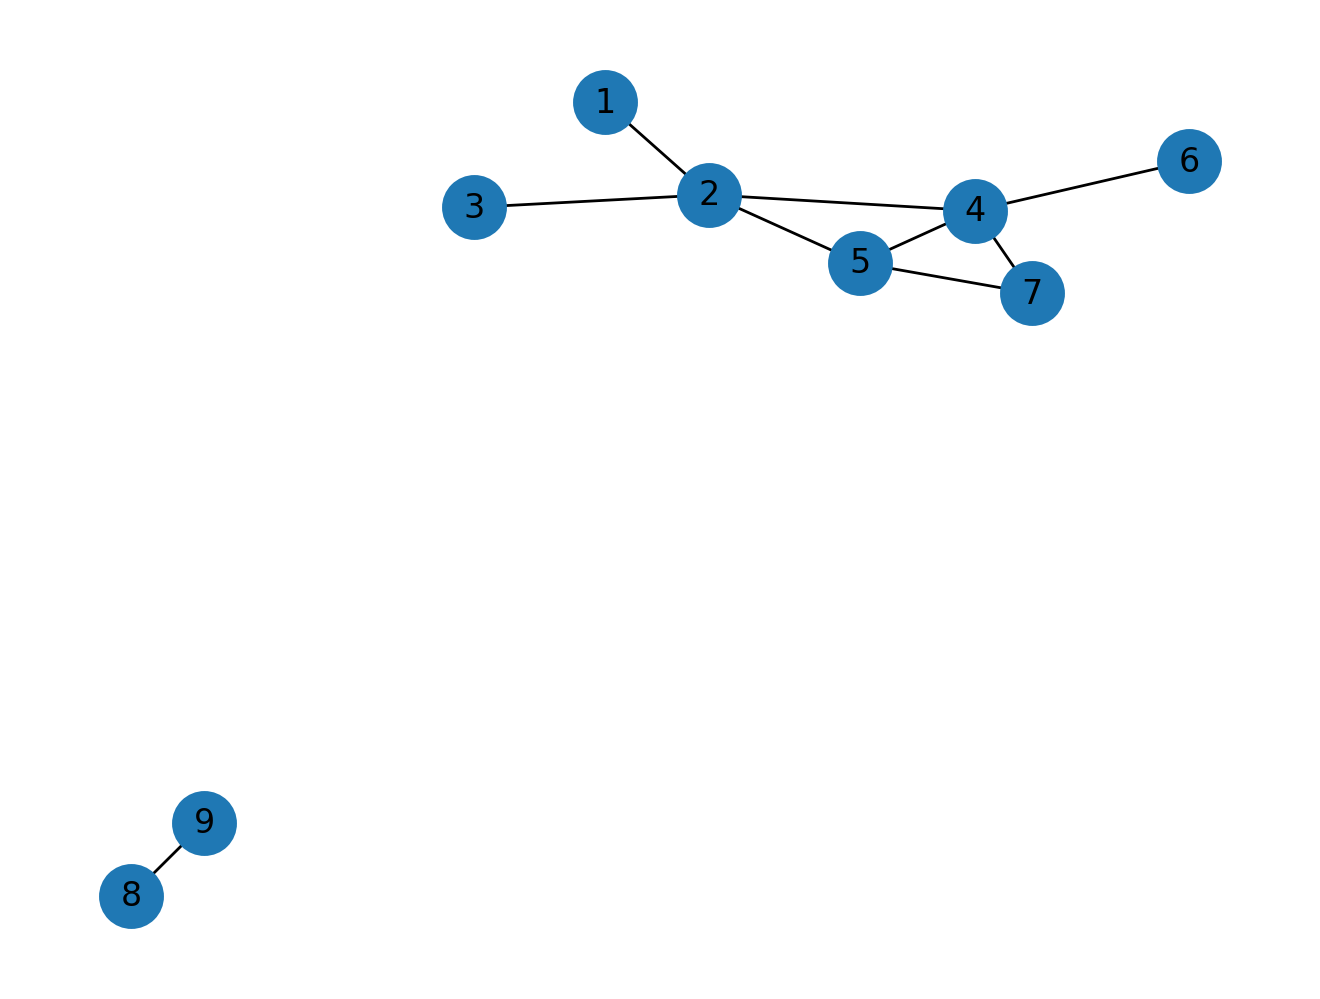

In [105]:
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5,6,7,8,9])
G.add_edges_from([(1,2),(2,3),(2,4),(2,5),(4,5),(4,6),(4,7),(5,7),(8,9)])
nx.draw(G, node_size=500, with_labels=True)

In [106]:
# 首先判断网络的连通性
print(nx.is_connected(G))
# 获取连通组件（子图）的数量
print(nx.number_connected_components(G))

False
2


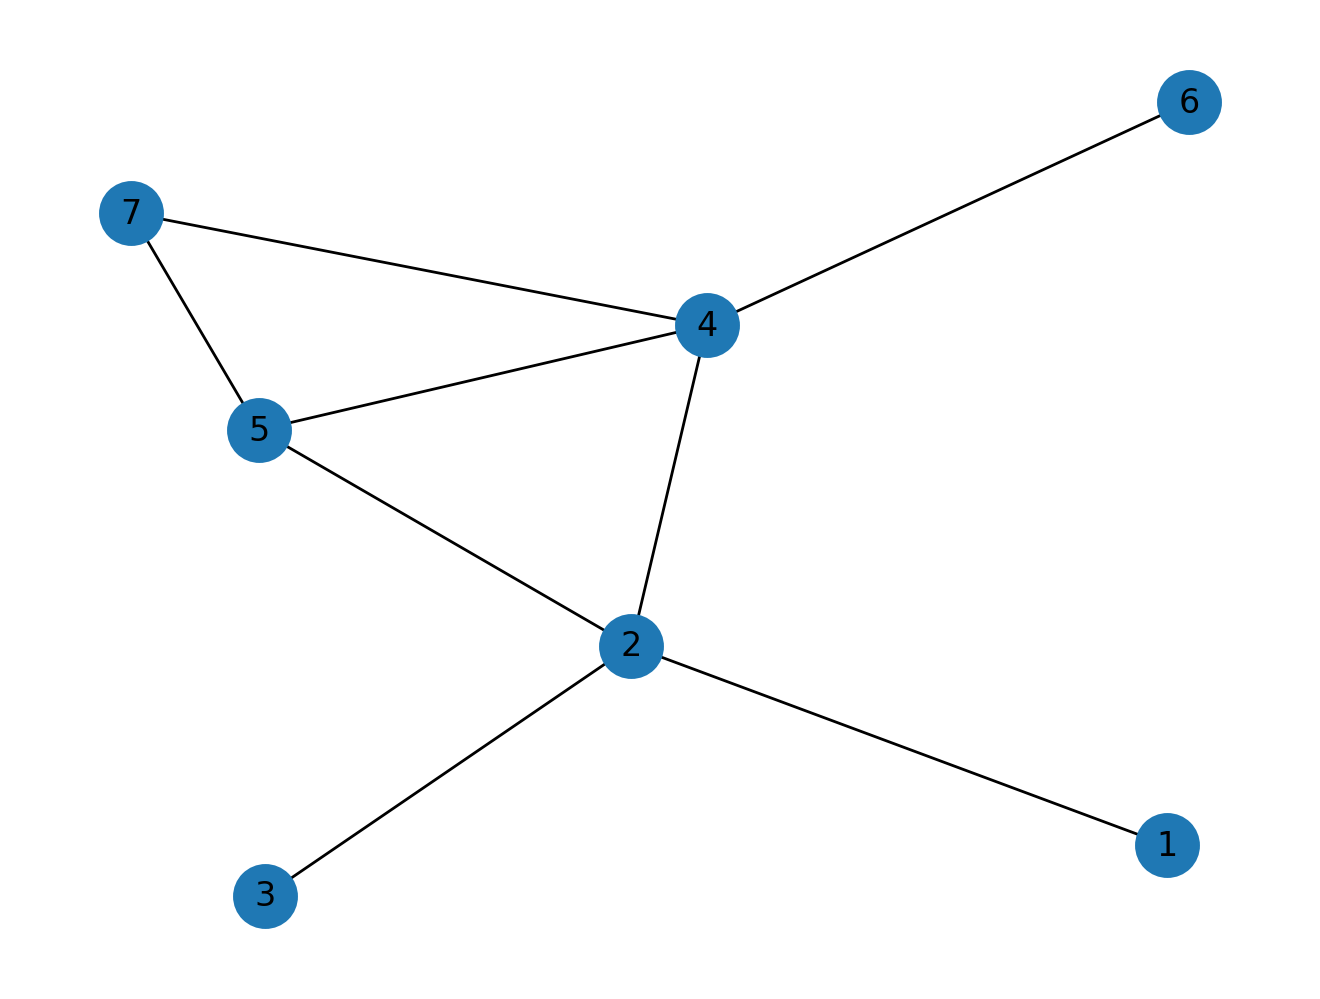

In [107]:
# 获取所有连通子图：降序排序
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
# 获取最大连通子图
largest_cc = G.subgraph(Gcc[0])
nx.draw(largest_cc, node_size=500, with_labels=True)

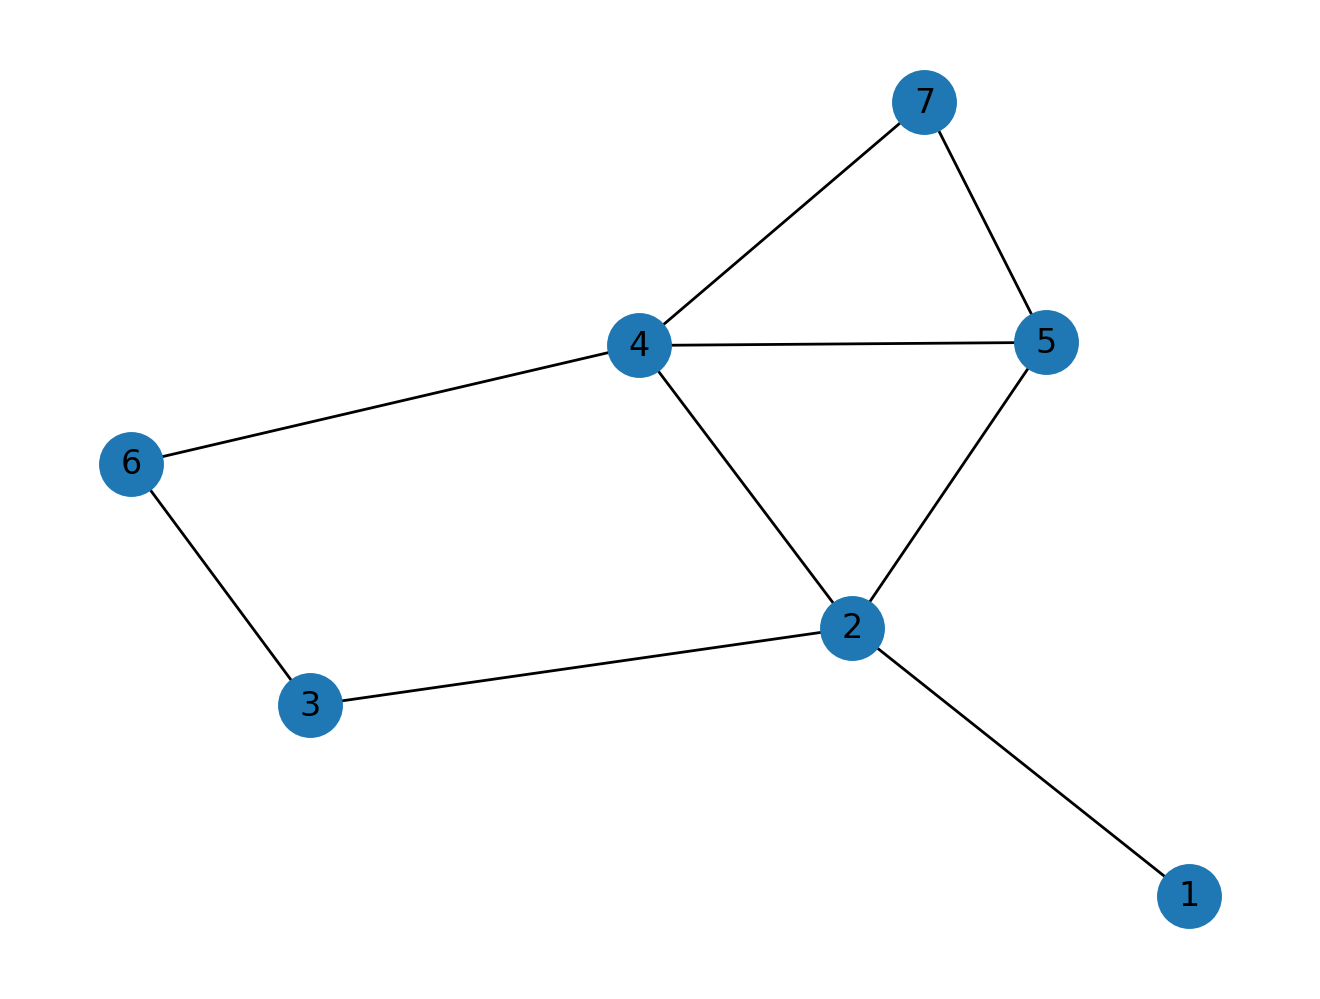

In [108]:
# largest_cc.add_edge(3,6) # 连通子图不支持修改：NetworkXError: Frozen graph can't be modified
# 可以复制，在复制的图上修改
LCC = largest_cc.copy()
LCC.add_edge(3,6)
nx.draw(LCC, node_size=500, with_labels=True)

## 集聚系数

In [109]:
# 节点集聚系数
print(nx.clustering(G,2))
# 全局集聚系数
print(nx.transitivity(G))
# 平均集聚系数
print(nx.average_clustering(G))

0.16666666666666666
0.375
0.24074074074074073


## 邻居

In [110]:
# 获取指定节点的邻居
print(list(nx.neighbors(G, 2)))
# 获取指定节点的非邻居
print(list(nx.non_neighbors(G, 2)))
# 获取图中两个节点的公共邻居
print(list(nx.common_neighbors(G, 2, 4)))

[1, 3, 4, 5]
[6, 7, 8, 9]
[5]


## 其他矩阵

In [111]:
# 返回G的关联矩阵：N*M，N为节点数，M为连边数
IM = nx.incidence_matrix(G)
IM.todense()

array([[1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 1., 1., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [112]:
# 返回G的拉普拉斯矩阵
Ls = nx.laplacian_matrix(G)
# print(Ls)
L = Ls.todense()  # L = D - A，D为节点度组成的对角矩阵，A为邻接矩阵
print(L)

[[ 1 -1  0  0  0  0  0  0  0]
 [-1  4 -1 -1 -1  0  0  0  0]
 [ 0 -1  1  0  0  0  0  0  0]
 [ 0 -1  0  4 -1 -1 -1  0  0]
 [ 0 -1  0 -1  3  0 -1  0  0]
 [ 0  0  0 -1  0  1  0  0  0]
 [ 0  0  0 -1 -1  0  2  0  0]
 [ 0  0  0  0  0  0  0  1 -1]
 [ 0  0  0  0  0  0  0 -1  1]]


标准化的拉普拉斯矩阵如下：
$$
N=D^{-1 / 2} L D^{-1 / 2}
$$

In [113]:
# 返回G的标准化拉普拉斯矩阵
NLs = nx.normalized_laplacian_matrix(G)
NL = NLs.todense()
print(NL)

[[ 1.         -0.5         0.          0.          0.          0.
   0.          0.          0.        ]
 [-0.5         1.         -0.5        -0.25       -0.28867513  0.
   0.          0.          0.        ]
 [ 0.         -0.5         1.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.         -0.25        0.          1.         -0.28867513 -0.5
  -0.35355339  0.          0.        ]
 [ 0.         -0.28867513  0.         -0.28867513  1.          0.
  -0.40824829  0.          0.        ]
 [ 0.          0.          0.         -0.5         0.          1.
   0.          0.          0.        ]
 [ 0.          0.          0.         -0.35355339 -0.40824829  0.
   1.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          1.         -1.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.         -1.          1.        ]]


In [114]:
# 计算邻接矩阵的特征值
print(np.real(nx.adjacency_spectrum(G)))

[ 2.83206645e+00 -2.07484993e+00  1.06166256e+00 -1.37057214e+00
 -7.57216519e-01 -9.17257515e-17  3.08909585e-01  1.00000000e+00
 -1.00000000e+00]


In [115]:
# 计算拉普拉斯矩阵的特征值：第一个特征值通常为0
print(np.real(nx.laplacian_spectrum(G)))

[-2.46722064e-16  0.00000000e+00  6.15041252e-01  1.00000000e+00
  1.15092343e+00  2.00000000e+00  3.11180902e+00  4.62292855e+00
  5.49929776e+00]
